In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 4

In [28]:
# initial conditions
y0 = 1.0
h = 0.5


# y' = f(y)
def f(y):
    return -5 * y

Przekształcenie metody niejawnej:

$ y_{k+1} = y_k + h_k f(t_{k+1}, y_{k+1})$

$ y_{k+1} = y_k - 5 * 0.5 y_{k+1} $

$ y_{k+1} = \dfrac{2y_k}{7}$

In [29]:
# explicit method
def euler_explicit(yk, hk, f):
    return yk + hk * f(yk)

# transformed implicit method
def euler_implicit(yk):
    return 2. / 7. * yk


In [30]:
START = 0
END = 10

# number of iterations
n = round((END - START) / h)

result_explicit = np.empty(n+1, dtype=np.double)
result_implicit = np.empty(n+1, dtype=np.double)

result_explicit[0] = y0
result_implicit[0] = y0


for i in range(n):
    result_explicit[i+1] = euler_explicit(result_explicit[i], h, f)
    result_implicit[i+1] = euler_implicit(result_implicit[i])


#analytic solution
def y(x):
    return np.exp(-5 * x)

### Sprawdzenie wyników dla t = 0.5

In [31]:
print(f"Actual: {y(0.5)}")
print(f"Euler explicit: {result_explicit[1]}")
print(f"Euler implicit: {result_implicit[1]}")

Actual: 0.0820849986238988
Euler explicit: -1.5
Euler implicit: 0.2857142857142857


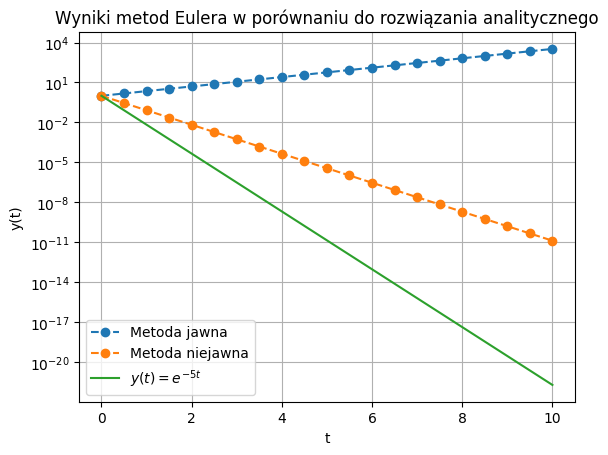

In [32]:
xs = np.linspace(START, END, n + 1)
plt.plot(xs, abs(result_explicit), label="Metoda jawna", ls="--", marker="o")
plt.plot(xs, result_implicit, label="Metoda niejawna", ls="--", marker="o")
plt.semilogy(xs, y(xs), label = r'$y(t) = e^{-5t}$')
plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Wyniki metod Eulera w porównaniu do rozwiązania analitycznego")
plt.grid()
plt.show()

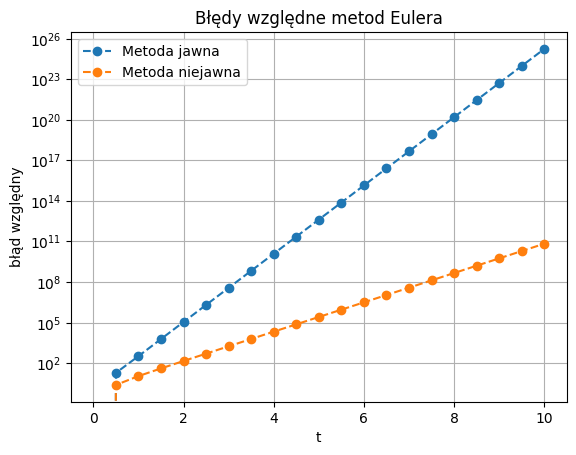

In [33]:
def relative_err(res, actual): 
    return np.abs(actual - res) / actual

relative_err_explicit = [relative_err(result_explicit[i], y(i * h)) for i in range(n + 1)]
relative_err_implicit = [relative_err(result_implicit[i], y(i * h)) for i in range(n + 1)]


plt.yscale("log")
plt.plot(xs, relative_err_explicit, label = "Metoda jawna", ls="--", marker="o")
plt.plot(xs, relative_err_implicit, label = "Metoda niejawna", ls="--", marker="o")
plt.xlabel('t')
plt.ylabel('błąd względny')
plt.title("Błędy względne metod Eulera")
plt.legend()
plt.grid()

# Zadanie 6

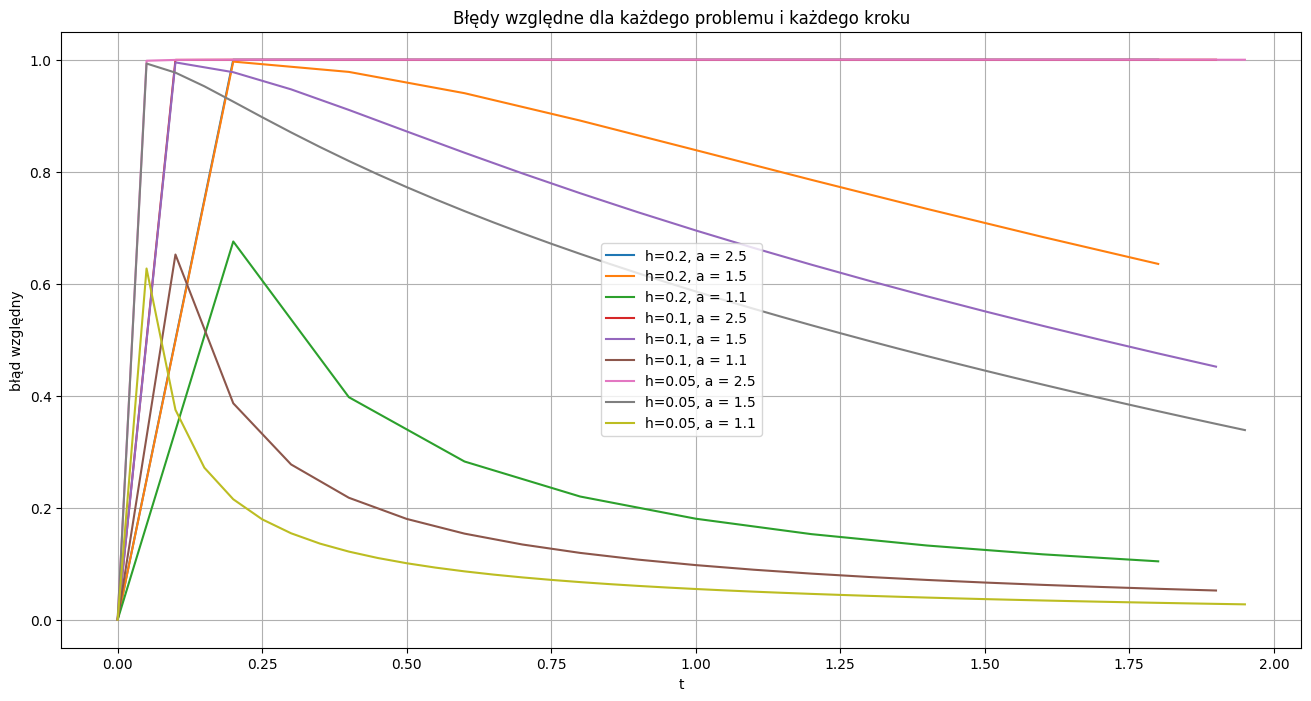

In [44]:
# we have to start with small const, otherwise it will all be 0
BEG = 10**-6
END = 2.

def y2(a, t):
    return a * t**(a-1)

def y2_res(a, t):
    return t**a

# już nie mam siły żeby napisać to porządnie

ih1 = round((END-BEG)/0.2)
ih2 = round((END-BEG)/0.1)
ih3 = round((END-BEG)/0.05)

results_h1 = np.array([[BEG for _ in range(ih1)] for _ in range(3)], dtype=np.double)
results_h2 = np.array([[BEG for _ in range(ih2)] for _ in range(3)], dtype=np.double)
results_h3 = np.array([[BEG for _ in range(ih3)] for _ in range(3)], dtype=np.double)

errors_h1 = np.empty_like(results_h1)
errors_h2 = np.empty_like(results_h2)
errors_h3 = np.empty_like(results_h3)

rel_errors_h1 = np.empty_like(results_h1)
rel_errors_h2 = np.empty_like(results_h2)
rel_errors_h3 = np.empty_like(results_h3)

for i, a in enumerate([2.5, 1.5, 1.1]):
    h = 0.2
    iterations = round((END - BEG)/h)
    for j in range(1, iterations):
        results_h1[i][j] = euler_explicit(results_h1[i][j-1], h, lambda x: y2(a, x))
        rel_errors_h1[i][j] = abs(abs(results_h1[i][j] - y2_res(a, h*j)) / y2_res(a, h*j))
        errors_h1[i][j] = abs(results_h1[i][j] - y2_res(a, h*j))
        
    h = 0.1
    iterations = round((END - BEG)/h)
    for j in range(1, iterations):
        results_h2[i][j] = euler_explicit(results_h2[i][j-1], h, lambda x: y2(a, x))
        rel_errors_h2[i][j] = abs(abs(results_h2[i][j] - y2_res(a, h*j)) / y2_res(a, h*j))
        errors_h2[i][j] = abs(results_h2[i][j] - y2_res(a, h*j))

    h = 0.05
    iterations = round((END - BEG)/h)
    for j in range(1, iterations):
        results_h3[i][j] = euler_explicit(results_h3[i][j-1], h, lambda x: y2(a, x))
        rel_errors_h3[i][j] = abs(abs(results_h3[i][j] - y2_res(a, h*j)) / y2_res(a, h*j))
        errors_h3[i][j] = abs(results_h3[i][j] - y2_res(a, h*j))
        
    

xs1 = np.arange(BEG, END, 0.2)
xs2 = np.arange(BEG, END, 0.1)
xs3 = np.arange(BEG, END, 0.05)

plt.figure(figsize=(16, 8))
plt.plot(xs1, rel_errors_h1[0], label="h=0.2, a = 2.5")
plt.plot(xs1, rel_errors_h1[1], label="h=0.2, a = 1.5")
plt.plot(xs1, rel_errors_h1[2], label="h=0.2, a = 1.1")

plt.plot(xs2, rel_errors_h2[0], label="h=0.1, a = 2.5")
plt.plot(xs2, rel_errors_h2[1], label="h=0.1, a = 1.5")
plt.plot(xs2, rel_errors_h2[2], label="h=0.1, a = 1.1")

plt.plot(xs3, rel_errors_h3[0], label="h=0.05, a = 2.5")
plt.plot(xs3, rel_errors_h3[1], label="h=0.05, a = 1.5")
plt.plot(xs3, rel_errors_h3[2], label="h=0.05, a = 1.1")

plt.title("Błędy względne dla każdego problemu i każdego kroku")
plt.xlabel("t")
plt.ylabel("błąd względny")
plt.legend()
plt.grid()
plt.show()



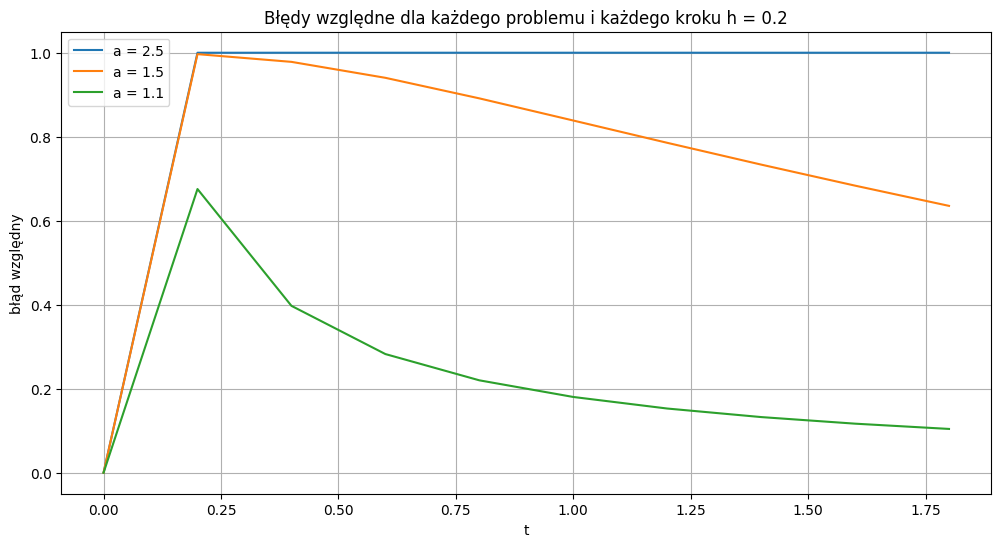

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs1, rel_errors_h1[0], label="a = 2.5")
plt.plot(xs1, rel_errors_h1[1], label="a = 1.5")
plt.plot(xs1, rel_errors_h1[2], label="a = 1.1")

plt.title("Błędy względne dla każdego problemu i każdego kroku h = 0.2")
plt.xlabel("t")
plt.ylabel("błąd względny")
plt.legend()
plt.grid()
plt.show()


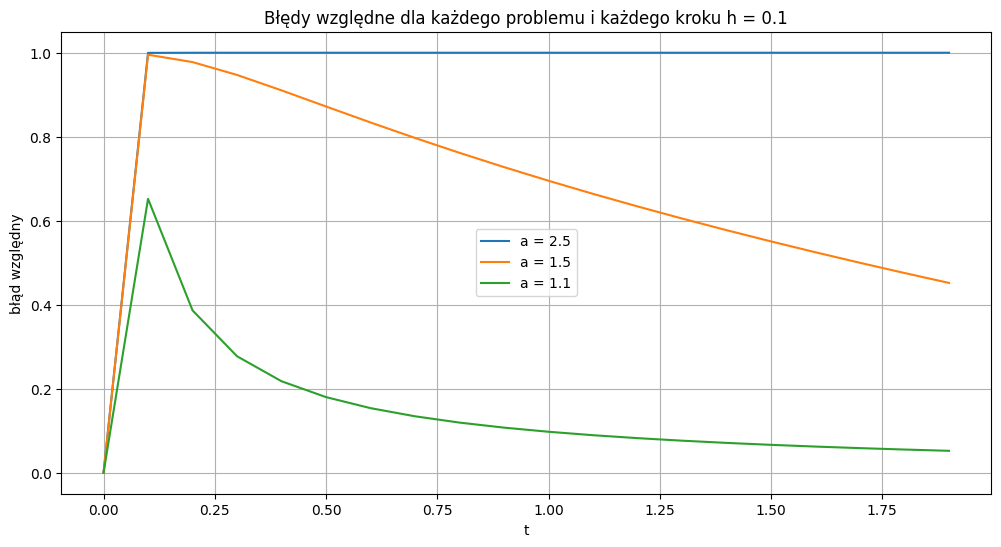

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs2, rel_errors_h2[0], label="a = 2.5")
plt.plot(xs2, rel_errors_h2[1], label="a = 1.5")
plt.plot(xs2, rel_errors_h2[2], label="a = 1.1")

plt.title("Błędy względne dla każdego problemu i każdego kroku h = 0.1")
plt.xlabel("t")
plt.ylabel("błąd względny")
plt.legend()
plt.grid()
plt.show()


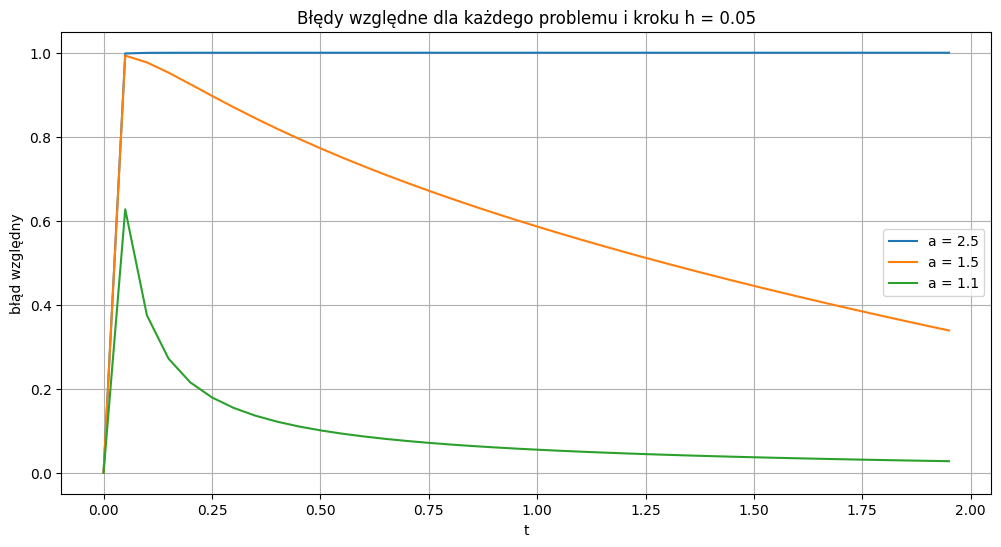

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs3, rel_errors_h3[0], label="a = 2.5")
plt.plot(xs3, rel_errors_h3[1], label="a = 1.5")
plt.plot(xs3, rel_errors_h3[2], label="a = 1.1")

plt.title("Błędy względne dla każdego problemu i kroku h = 0.05")
plt.xlabel("t")
plt.ylabel("błąd względny")
plt.legend()
plt.grid()
plt.show()


In [ ]:
def eps(errors):
    return np.log(errors[-1] / errors[-2]) / np.log(errors[-2] / errors[-3])

# przedstawiam je tylko dla h = 0.1, bo wszystkie będą podobne
print("Empiryczne rzędy zbieżności")
print(f"a = 2.5, h = 0.1, r = {eps(errors_h2[0])}")
print(f"a = 1.5, h = 0.1, r = {eps(errors_h2[1])}")
print(f"a = 1.1, h = 0.1, r = {eps(errors_h2[2])}")


# 6 rząd zbieżności to jak maleje dla różnych h

# 5 wartości własne macierzy, a nie to co tam dałem

# 4 dodać treści, h jest źle, ma być ze schematu iteracyjnego, dopisać w a asymptotyczną zbieżność

# 3 wychodzi inny przedział

# 1 poprawić kolejność, pochodne mają być po jednej stronie

Empiryczne rzędy zbieżności
a = 2.5, h = 0.1, r = 0.8231885220727091
a = 1.5, h = 0.1, r = 1.0213009280469978
a = 1.1, h = 0.1, r = 0.9624557761325151
